In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
#pd.set_option('display.max_rows', None)

from IPython.display import display, HTML


price_df = pd.read_csv('zillow-yearly-ca.csv').rename(columns={'RegionName': 'county'})
price_df['county'] = price_df['county'].apply(lambda x: x.replace(' County', ''))
price_df['fips_code'] = price_df.apply(lambda x: f'{x.fips_code:05}', axis=1).tolist()
display(price_df)
print(f'Number of counties: {len(price_df.fips_code.unique())}')

income_df = pd.read_csv('Income_with_FIPS.csv').rename(columns={'taxable_year': 'year'})
income_df['fips_code'] = income_df.apply(lambda x: f'{x.fp:05}', axis=1).tolist()
income_df = income_df[['fips_code', 'year', 'county', 'population', 'median_income']]
display(income_df)
print(f'Number of counties: {len(income_df.fips_code.unique())}')

burn_df = pd.read_csv('cleaned_fire_percent.csv').rename(columns={'YEAR_': 'year', 'NAMELSAD': 'county'})
burn_df['county'] = burn_df['county'].apply(lambda x: x.replace(' County', ''))
fips = burn_df.apply(lambda x: f'{x.STATEFP:02}{x.COUNTYFP:03}', axis=1).tolist()
burn_df.insert(0, 'fips_code', fips)
burn_df = burn_df[['fips_code', 'year', 'county', 'total_burn_pyr', 'perc_burn']]
burn_df['year'] = burn_df['year'].astype(int)
display(burn_df)
print(f'Number of counties: {len(burn_df.fips_code.unique())}')

input_df = price_df.merge(income_df, on=['fips_code', 'year', 'county']).merge(burn_df, on=['fips_code', 'year', 'county'])
print(f'Number of counties: {len(input_df.fips_code.unique())}')
input_df = input_df.drop(columns=['county'])
display(input_df)

,fips_code,county,year,price
0,06001,Alameda,2000,302255.314092
1,06001,Alameda,2001,368098.179928
2,06001,Alameda,2002,393708.303015
3,06001,Alameda,2003,427010.475210
4,06001,Alameda,2004,484363.003599
...,...,...,...,...
1387,06115,Yuba,2019,291275.185476
1388,06115,Yuba,2020,314465.065842
1389,06115,Yuba,2021,371635.057158
1390,06115,Yuba,2022,413854.162305


Number of counties: 58


,fips_code,year,county,population,median_income
0,06001,1995,Alameda,1347700,28329
1,06003,1995,Alpine,1200,23999
2,06005,1995,Amador,32600,24729
3,06007,1995,Butte,196100,20036
4,06009,1995,Calaveras,36950,23563
...,...,...,...,...,...
1503,06107,2020,Tulare,473482,30151
1504,06109,2020,Tuolumne,55500,39102
1505,06111,2020,Ventura,844545,44494
1506,06113,2020,Yolo,216544,44881


Number of counties: 58


,fips_code,year,county,total_burn_pyr,perc_burn
0,06091,2000,Sierra,6.748577e+04,0.002711
1,06091,2001,Sierra,2.753879e+06,0.110615
2,06091,2003,Sierra,2.429302e+05,0.009758
3,06091,2004,Sierra,1.117228e+06,0.044876
4,06091,2005,Sierra,9.159885e+06,0.367926
...,...,...,...,...,...
1081,06079,2018,San Luis Obispo,5.988013e+06,0.063943
1082,06079,2019,San Luis Obispo,2.196040e+07,0.234503
1083,06079,2020,San Luis Obispo,4.020842e+07,0.429363
1084,06079,2021,San Luis Obispo,8.947344e+05,0.009554


Number of counties: 57
Number of counties: 55


,fips_code,year,price,population,median_income,total_burn_pyr,perc_burn
0,06001,2000,302255.314092,1466900,37580,3.052264e+05,0.014358
1,06001,2001,368098.179928,1479300,38582,4.758508e+05,0.022384
2,06001,2002,393708.303015,1488000,38044,1.230661e+06,0.057891
3,06001,2003,427010.475210,1493928,38411,1.642332e+07,0.772567
4,06001,2005,585124.011579,1502703,40613,2.040273e+07,0.959761
...,...,...,...,...,...,...,...
959,06115,2016,223107.534460,76138,32937,2.255334e+06,0.135335
960,06115,2017,248179.174297,76767,33537,5.347435e+07,3.208806
961,06115,2018,273093.321349,77426,34903,2.818490e+05,0.016913
962,06115,2019,291275.185476,79089,36246,9.799734e+05,0.058805


In [26]:

# Calculate the percentage change grouped by location
input_df['Price_perc_change'] = input_df.groupby('fips_code')['price'].pct_change() * 100

# Display the DataFrame
print(input_df)


    fips_code  year          price  population  median_income  total_burn_pyr  \
0       06001  2000  302255.314092     1466900          37580    3.052264e+05   
1       06001  2001  368098.179928     1479300          38582    4.758508e+05   
2       06001  2002  393708.303015     1488000          38044    1.230661e+06   
3       06001  2003  427010.475210     1493928          38411    1.642332e+07   
4       06001  2005  585124.011579     1502703          40613    2.040273e+07   
..        ...   ...            ...         ...            ...             ...   
959     06115  2016  223107.534460       76138          32937    2.255334e+06   
960     06115  2017  248179.174297       76767          33537    5.347435e+07   
961     06115  2018  273093.321349       77426          34903    2.818490e+05   
962     06115  2019  291275.185476       79089          36246    9.799734e+05   
963     06115  2020  314465.065842       81468          37086    9.755447e+06   

     perc_burn  Price_perc_

In [27]:
# Remove the first N rows since it doesn't have data from previous N years to make prediction
input_df = input_df[~input_df.isnull().any(axis=1)].reset_index(drop=True)
print(input_df)

    fips_code  year          price  population  median_income  total_burn_pyr  \
0       06001  2001  368098.179928     1479300          38582    4.758508e+05   
1       06001  2002  393708.303015     1488000          38044    1.230661e+06   
2       06001  2003  427010.475210     1493928          38411    1.642332e+07   
3       06001  2005  585124.011579     1502703          40613    2.040273e+07   
4       06001  2006  627743.227682     1513859          42360    9.687559e+06   
..        ...   ...            ...         ...            ...             ...   
904     06115  2016  223107.534460       76138          32937    2.255334e+06   
905     06115  2017  248179.174297       76767          33537    5.347435e+07   
906     06115  2018  273093.321349       77426          34903    2.818490e+05   
907     06115  2019  291275.185476       79089          36246    9.799734e+05   
908     06115  2020  314465.065842       81468          37086    9.755447e+06   

     perc_burn  Price_perc_

In [15]:
input_df = input_df.drop(columns=['price'])

In [28]:
input_df = input_df[["fips_code","year","Price_perc_change","population","median_income","total_burn_pyr", "perc_burn", "price"]]
print(input_df)

    fips_code  year  Price_perc_change  population  median_income  \
0       06001  2001          21.783857     1479300          38582   
1       06001  2002           6.957416     1488000          38044   
2       06001  2003           8.458590     1493928          38411   
3       06001  2005          37.028023     1502703          40613   
4       06001  2006           7.283792     1513859          42360   
..        ...   ...                ...         ...            ...   
904     06115  2016          10.981621       76138          32937   
905     06115  2017          11.237469       76767          33537   
906     06115  2018          10.038774       77426          34903   
907     06115  2019           6.657748       79089          36246   
908     06115  2020           7.961502       81468          37086   

     total_burn_pyr  perc_burn          price  
0      4.758508e+05   0.022384  368098.179928  
1      1.230661e+06   0.057891  393708.303015  
2      1.642332e+07   0.772

In [34]:
# Join last year data per row
N = 1
df = input_df
for lag in range(1, N+1):
    shifted = input_df.groupby(by=['fips_code']).shift(lag).drop(columns=['year'])
    df = df.join(shifted.rename(columns=lambda x: f"{x}-prev_{lag}"))
df = df.drop(columns=input_df.columns[3:])
# Remove the first N rows since it doesn't have data from previous N years to make prediction
df = df[~df.isnull().any(axis=1)].reset_index(drop=True)
display(df)

,fips_code,year,Price_perc_change,Price_perc_change-prev_1,population-prev_1,median_income-prev_1,total_burn_pyr-prev_1,perc_burn-prev_1,price-prev_1
0,06001,2002,6.957416,21.783857,1479300.0,38582.0,4.758508e+05,0.022384,368098.179928
1,06001,2003,8.458590,6.957416,1488000.0,38044.0,1.230661e+06,0.057891,393708.303015
2,06001,2005,37.028023,8.458590,1493928.0,38411.0,1.642332e+07,0.772567,427010.475210
3,06001,2006,7.283792,37.028023,1502703.0,40613.0,2.040273e+07,0.959761,585124.011579
4,06001,2010,-28.793912,7.283792,1513859.0,42360.0,9.687559e+06,0.455711,627743.227682
...,...,...,...,...,...,...,...,...,...
849,06115,2016,10.981621,9.045350,75579.0,32059.0,1.055827e+06,0.063356,201031.065279
850,06115,2017,11.237469,10.981621,76138.0,32937.0,2.255334e+06,0.135335,223107.534460
851,06115,2018,10.038774,11.237469,76767.0,33537.0,5.347435e+07,3.208806,248179.174297
852,06115,2019,6.657748,10.038774,77426.0,34903.0,2.818490e+05,0.016913,273093.321349


Number of features: 6
Train: 512
Test: 342
RMSE: 238.00


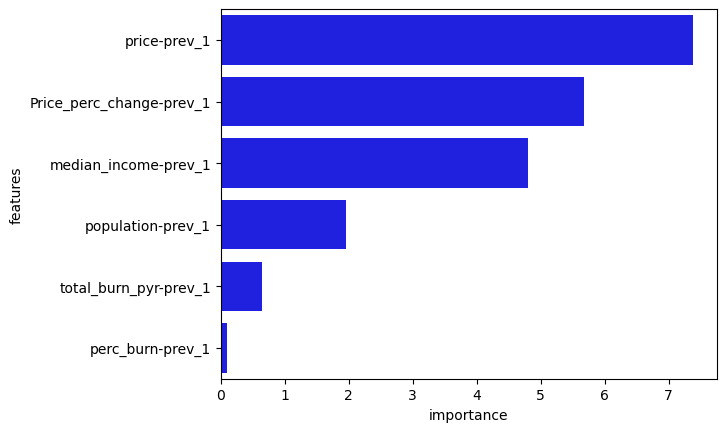

In [35]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error


feat_cols = df.columns[3:]
X = df[feat_cols].values
y = df.Price_perc_change

# Random split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print(f'Number of features: {len(feat_cols)}')
print(f'Train: {len(X_train)}')
print(f'Test: {len(X_test)}')

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_test_predict = model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_test_predict)
#rmsle = mean_squared_log_error(y_test, y_test_predict)
print(f'RMSE: {rmse:.2f}')
#print(f'RMSLE: {rmsle:.2f}')

lg_importances = pd.DataFrame(data={
    'features': feat_cols,
    'importance': abs(model.coef_)
})
lg_importances = lg_importances.sort_values(by='importance', ascending=False)
#display(lg_importances)

sns.barplot(x="importance", y="features", data=lg_importances, label="Feature Importance", color="b")
plt.show()